In [1]:

#
# importación
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'

from sklearn import datasets

cancer = datasets.load_breast_cancer()



## Análisis de Componentes Principales (PCA)

Aquí pasamos a un tema que está entre medio del preprocesamiento y el aprendizaje.

El análisis de componentes principales (Principal Component Analysis) es una herramienta fundamental de amplio uso en el análisis de datos desde hace más de 100 años! Hoy en día, con las facilidades computacionales de las que disponemos, es una técnica accesible y muy útil.

Para no entrar en detalles matemáticos, que no son triviales, veámoslo con el siguiente ejemplo:



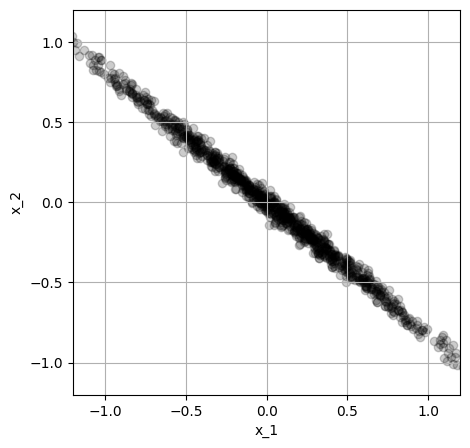

In [2]:
#
# generamos datos sintéticos
#
def cigarro(n=1000):
  '''
  esta función genera una nube de puntos alargada
  '''
  X = rng.randn(n,2)
  y = rng.rand(n) > 0.50
  A = np.array([[0.5,-0.4],[-0.2,0.2]])
  X = np.dot(X,A)
  return X,y
#
# llamamos a la función
#
X,y = cigarro()
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],color=(0,0,0,0.2))
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.show()


Los datos anteriores se distribuyen en el plano de una manera muy particular: claramente hay una _dirección principal_a lo largo de la cual hay más _variación_ en los datos. En la dirección perpendicular los puntos están muy apretados.

Si por alguna razón sólo pudiéramos  analizar estos datos en una dirección sin otra información que la distribución espacial de los puntos, sin dudas lo haríamos en la dirección de mayor variación. De eso se trata PCA.

PCA efectúa una _transformación_ de los datos, un _cambio de coordenadas_, de manera que, en el nuevo sistema de coordenadas, la primera coordenada es la de mayor variación y la última es la de menos variación. De esa manera, si tenemos que restringir nuestro análisis a unas pocas coordenadas, nos quedamos sólo con las primeras.

En el ejemplo anterior, si tenemos dos direcciones y queremos quedarnos sólo con la primera, hacemos lo siguiente:

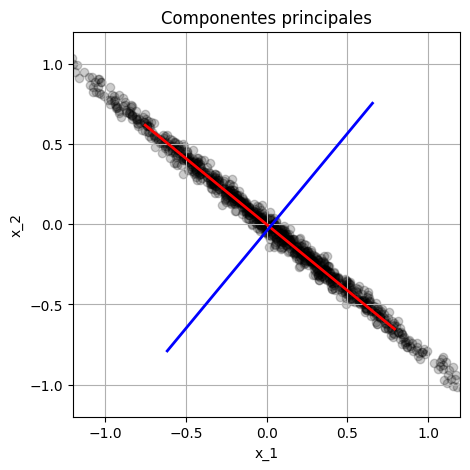

In [3]:
from sklearn.decomposition import PCA


#
#  crucial en PCA: centramos los datos primero!
#
mu = np.mean(X,axis=0)
X_center = X - mu
#
# calculamos las direcciones principales
#
pca = PCA(n_components=2)
pca.fit(X_center)

#
# mostramos los componentes
#
c1 = pca.components_[0,:]
c2 = pca.components_[1,:]

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],color=(0,0,0,0.2))
a = mu - c1
b = mu + c1
plt.plot((a[0],b[0]),(a[1],b[1]),'r',lw=2)
a = mu - c2
b = mu + c2
plt.plot((a[0],b[0]),(a[1],b[1]),'b',lw=2)

plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.grid(True)
plt.title('Componentes principales')
plt.show()


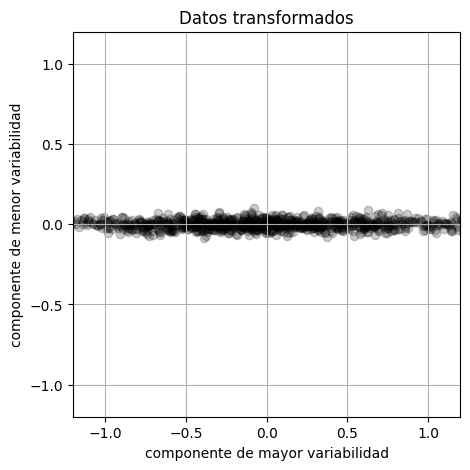

In [4]:
#
# representamos (transformamos) nuestros datos en las nuevas coordenadas
#
plt.figure(figsize=(5,5))
X_pca = pca.transform(X_center)
plt.scatter(X_pca[:,0],X_pca[:,1],color=(0,0,0,0.2))
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.title('Datos transformados')
plt.xlabel('componente de mayor variabilidad')
plt.ylabel('componente de menor variabilidad')
plt.grid(True)
plt.show()


## Observación

Como podemos ver, luego de transformados, los datos están "acostados" sobre el eje principal (el eje 'x'). Ahora vamos a ver cómo aplicar esta técnica para visualizar datos de altas dimensiones en 2D.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.6 MB/s eta 0:00:00
NOTA: Los datos originales tienen 30 dimensiones
NOTA: vamos a quedarnos sólo con DOS!


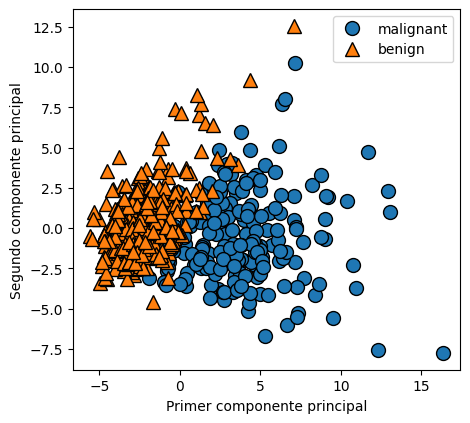

In [5]:
!pip install --quiet mglearn

import mglearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#
# datos a analizar: cancer de mama
#
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
print('NOTA: Los datos originales tienen',X.shape[1],'dimensiones')
print('NOTA: vamos a quedarnos sólo con DOS!')
#
# centramos y normalizamos los datos
#
preproc = StandardScaler()
preproc.fit(X)
X_scaled = preproc.transform(X)
#
# calculamos los ejes principales
# sólo nos interesa preservar DOS, ya que nuestro objetivo
# es visualizar los datos en pantalla
#
pca = PCA(n_components=2)
pca.fit(X_scaled)
#
# proyectamos (transformamos) los datos sobre
# los dos ejes principales calculados
#
X_pca = pca.transform(X_scaled)
#
# mostramos la nube de puntos proyectada sobre los ejes
# principales
#
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Primer componente principal")
plt.ylabel("Segundo componente principal")

plt.show()

### Comentarios

Como puede verse, con sólo dos dimensiones alcanza para separar buena parte de los datos correspondientes a tumores malignos de los benignos. Como primera aproximación al problema, esto nos indica que hay esperanzas de automatizar este proceso con cierto éxito.

Es importante recordar que PCA es un método _no supervisado_. No toma en cuenta los datos de clase a la hora de hacer la transformación. Hay otros métodos que sí lo hacen (pero no vamos a entrar en ellos ahora).

Desafortunadamente, hay un trecho entre  tener una representación visual de los datos, y tener un modelo interpretable. En general, los ejes principales de PCA son combinaciones caprichosas y poco informativas de las coordenadas originales, es decir, de las características originales; las componentes en sí no significan nada.

## PCA para extracción de características

Ya hemos mencionado que una etapa importante de un sistema de aprendizaje automático es lograr una representación compacta y sucinta de los datos, de manera de facilitar las etapas de decisión posteriores. Este mismo tema, conocido como _extracción de características_, _feature extraction_ o _feature engineering_, será tratado especialmente en el próximo módulo.

En este momento nos limitaremos a comentar que PCA es una muy buena forma de resumir datos: debido a que es capaz de concentrar la variablidad de lo datos en unos pocos componentes, las coordenadas en estos componentes son candidatas naturales a ser usadas como características. Veamos en este mismo ejemplo qué pasa si queremos clasificar tumores usando componentes principales.

Lo que vamos a hacer es lo siguiente: por un lado vamos a tomar las $30$ características originales y vamos a construir 6 modelos lineales con las primeras 1, 5, 10, 15, 20 y 25.

Luego vamos a hacer lo mismo pero con las coordenadas de los datos sobre los ejes principales.





In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=30)

pca = PCA(n_components=30)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

for d in (1,5,10,15,20,25):
  model_a = SVC(C=10).fit(X_train[:,:d],y_train)
  model_b = SVC(C=10).fit(X_train_pca[:,:d],y_train)
  score_a = model_a.score(X_test[:,:d],y_test)
  score_b = model_b.score(X_test_pca[:,:d],y_test)
  print(f'componentes:{d:2} sin PCA:{score_a:4.2f} con PCA:{score_b:4.2f}')


componentes: 1 sin PCA:0.90 con PCA:0.90
componentes: 5 sin PCA:0.90 con PCA:0.97
componentes:10 sin PCA:0.94 con PCA:0.98
componentes:15 sin PCA:0.94 con PCA:0.97
componentes:20 sin PCA:0.96 con PCA:0.97
componentes:25 sin PCA:0.97 con PCA:0.97


### Comentarios

Como podemos ver, usando PCA logramos un desempeño casi máximo con tan sólo $5$ componentes, mientras que sin usar PCA necesitamos al menos $15$.

Como segunda observación, pero no menos importante: vemos que usando $10$ componentes principales logramos un _mejor_ desempeño que usando $25$! Por qué? Porque el modelo tiene menos parámetros y por ende resulta más adecuado para la cantidad de datos (relativamente poca) que hay en este dataset.


# Factorización de matrices

La buśqueda de explicaciones simples es un concepto muy poderoso en la filosofía de la ciencia y no es de extrañar que muchos métodos de análisis de datos se basen en ese principio.

En regresión por ejemplo, métodos como el LASSO buscan coeficientes lineales que sean en su mayoría cero; de esa manera, la variable de interés puede _explicarse_ como función de un conjunto pequeño de factores.

Los métodos de factorización matricial persiguen un objetivo similar. Dada una matriz $\mathbf{X}$ de tamaño $n{\times}m$, la idea es reescribir dicha matriz como
$$\mathbf{X} = \mathbf{U}\mathbf{V} + \mathbf{E},$$
donde $\mathbf{U}$ tiene tamaño $n{\times}k$, $\mathbf{V}$  $k{\times}m$, y $\mathbf{E}$ es del mismo tamaño que $\mathbf{X}$.

Cabe recordar que
$$\mathbf{U}\mathbf{V} = \sum_{r=1}^{k}\mathbf{U}[r,:] \mathbf{V}[:,r]$$
A cada par de fila $\mathbf{U}[r,:]$ y columna $\mathbf{V}[:,r]$ lo llamamos _factor_.

La gracia es lograr lo anterior con dos condiciones:

*   $k \ll m$ (pocos factores)
*   $\mathbf{E} \approx \mathbf{0}$ (poco error de aproximación)


Dicho de otra forma, queremos _aproximar_ $\mathbf{X}$ como la suma de $k$ factores.

Ahora, si $\mathbf{X}$ es una matriz de datos tal como venimos viendo, donde $n$ es la cantidad de muestras y $m$ es la dimensión de cada muestra, lo que queremos es _representar_  nuestros datos de dimensión $m$ como la suma de unos pocos factores.

## PCA como factorización de matrices

El método PCA que vimos antes es de hecho una forma, _la_ forma más común de factorizar matrices: las  filas de $\mathbf{V}$ son los _componentes_, y las columnas de $\mathbf{U}$ expresan el peso relativo de cada componente en cada una de las muestras de los datos. La gracia de PCA es que los factores se calculan de modo que los primeros factores son más importantes que los siguientes, lo que nos permite descartar factores arriba de un cierto valor $k$ y aún así mantener una buena representación ($\mathbf{E} \approx 0$).

## NMF

Hay muchísimos métodos de factorización de matrices. Entre los más populares están NMF: _Non-negative Matrix Factorization_. La idea es hacer algo similar a PCA, imponiendo que los factores y sus pesos sean _no negativos_. Esto a veces es importante cuando lo que se quiere explicar son fenómenos multicausales en donde cada _causa_ (factor) sólo puede _sumar_, nunca _restar_ al resultado final.

## Identificación de personas

Vamos a ver ahora el ejemplo utilizado en el libro para ilustrar el método NMF, y vamos a compararlo con PCA. Se trata de identificar personas a partir de fotos de su rostro.

En este caso, cada fila de la matriz de datos $\mathbf{X}$ es una imagen (_desenrollada_, con todos los pixeles en una sóla fila).

El tema aquí es que la imagen, como dato, tiene una dimensión _enorme_. Veremos que no es buena idea comparar imágenes pixel a pixel; es una comparación muy burda y muy sensible a cambios de iluminación o punto de vista, por dar algunos ejemplos.

En este caso también hay que hacer un poco de preprocesamiento. Resulta que la base de datos de caras tiene demasiados ejemplos de algunas personas; no es balanceado. Lo primero que vamos a hacer entonces es obtener una muestra que sea lo más equitativa de cáda persona en la base.



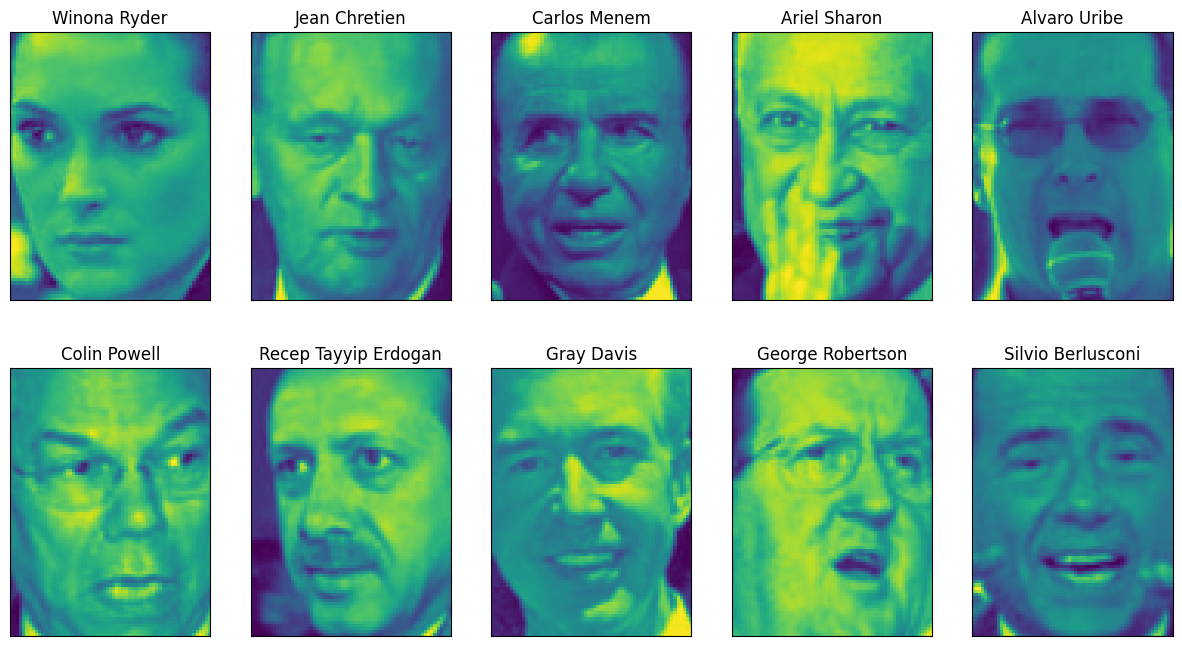

<ipython-input-7-effeba74dbd6>:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# base de datos de personas
#
people = datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
#
# visualización de los datos
#
fix, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])
plt.show()
#
# PREPROCESAMIENTO: balanceo
#
# tomamos un máximo de 50 caras por cada individuo
#
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
#
# PREPROCESAMIENTO: normalización
#
# normalizamos los datos para que el valor máximo de pixel sea 1
# y el menor 0.
# las imágenes suelen tener valores de entre 0 y 255, así que
# dividimos todo por 255
#
X_people = X_people / 255.


In [8]:
#
# PRIMERA PRUEBA
#
# veamos qué pasa si intentamos clasificar los rostros
# por cercanía en el espacio original.
# usaremos el ya conocido método de vecinos más cercanos
# usando UN sólo vecino como referencia.
#
from sklearn.neighbors import KNeighborsClassifier
#
# dividimos los datos en entrenamiento y prueba
#
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
#
# construimos el clasificador K-NN
#
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#
#
print("\n===================================")
print("1-NN sobre espacio original:")
print("\tDimensión:",X_test.shape[1])
print("\tscore {:.2f}".format(knn.score(X_test, y_test)))
print("===================================\n")




1-NN sobre espacio original:
	Dimensión: 5655
	score 0.22



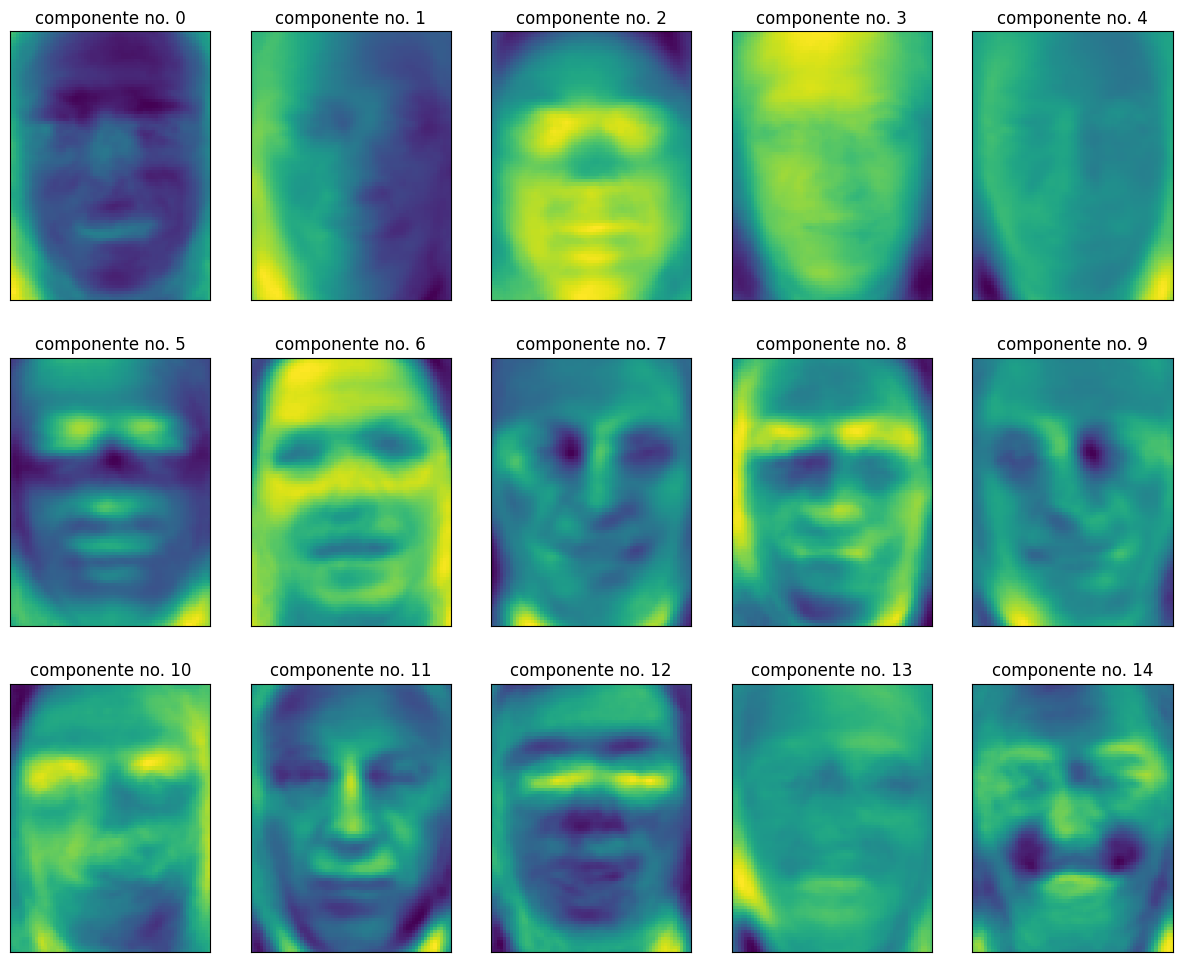

In [9]:
from sklearn.decomposition import PCA
#
# descomponemos los datos en 100 componentes usando PCA
# como vimos, lo que hace PCA por defecto es _rotar_ los datos
# de manera que los ejes se correspondan con direcciones de máxima variación
# en esta ocasión vamos a habilitar la opción _whiten_, que además de rotar,
#  normaliza los datos una vez transformados (como vimos al ppio de este notebook)
#
pca = PCA(n_components=100,whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)
#
# vemos los 15 componentes como imágenes
# estos componentes no son imágenes comunes, ya que tienen pixeles _negativos_
# algo que no tiene sentido físico.
#
fix, axes   = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})
for i ,(component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title(f"componente no. {i}")
  if i == 15:
    break
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


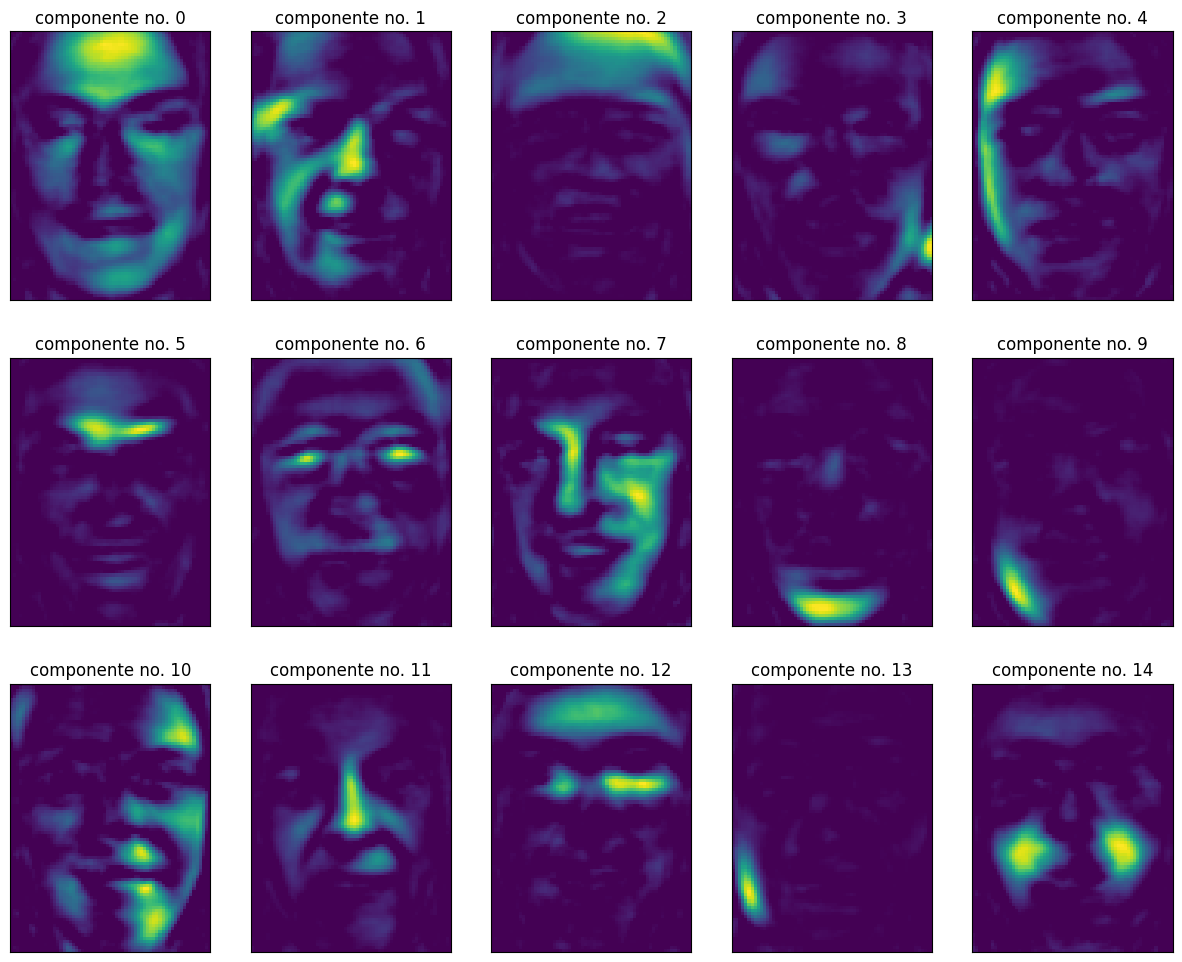

In [10]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#
# ahora hacemos la descomposición pero con 15 componentes no-negativos
# usando NMF.
# hay que tener en cuenta que NMF es un _tipo_ de descomposición; hay
# varios métodos distintos que hacen NMF
#
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf  = nmf.transform(X_test)
#
# mostramos los componentes como imágenes
#
fix, axes   = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw  = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title(f"componente no. {i}")
  if i == 15:
    break
plt.show()

In [11]:
#
# nuevamente clasificamos, ahora con los componentes
# obtenidos con cáda método
#
#
# repetimos método naïve, usando los datos originales
# (espacio de dimensión 5655)
#
knn_naive = KNeighborsClassifier(n_neighbors=2)
knn_naive.fit(X_train, y_train)
score_naive = knn_naive.score(X_test, y_test)
#
#
# ahora hacemos lo mismo pero con los 100 componentes elegidos con PCA
# (espacio de dimensión 100)
#
knn_pca = KNeighborsClassifier(n_neighbors=2)
knn_pca.fit(X_train_pca, y_train)
score_pca = knn_pca.score(X_test_pca, y_test)
#
#
# y finalmente pero con los 100 componentes elegidos por NMF
# (espacio de dimensión 100)
#
knn_nmf = KNeighborsClassifier(n_neighbors=2)
knn_nmf.fit(X_train_nmf, y_train)
score_nmf = knn_pca.score(X_test_nmf, y_test)
#
# comparamos los resultados
#
print("\n===================================")
print(f"naive: score {score_naive:.2f}")
print(f"PCA  : score {score_pca:.2f}")
print(f"NMF  : score {score_nmf:.2f}")
print("===================================\n")




naive: score 0.19
PCA  : score 0.25
NMF  : score 0.03

